This notebook is to generate a dataset to use with ultralytics YOLO-pose training

In [1]:
import os
import pandas as pd
import numpy as np
import yaml
import shutil
import cv2
import tqdm

In [3]:
keypoint_set = 'med_34'
data_root = '../data'
data_path = 'YOLO_' + keypoint_set

# rm -rf data_root/YOLO
shutil.rmtree(f'{data_root}/{data_path}', ignore_errors=True)

os.makedirs(f'{data_root}/{data_path}', exist_ok=True)

keypoints = yaml.load(open(f'../configs/keypoint_sets.yaml'), Loader=yaml.FullLoader)
keypoints = keypoints[keypoint_set]

In [8]:
def generate_set(filename):
    set_dir = os.path.join(data_root, data_path, filename)
    os.makedirs(set_dir, exist_ok=True)
    os.makedirs(os.path.join(set_dir, 'images'), exist_ok=True)
    os.makedirs(os.path.join(set_dir, 'labels'), exist_ok=True)
    df = pd.read_csv(os.path.join(data_root, f'{filename}.csv'))

    for i, row in tqdm.tqdm(df.iterrows(), total=len(df)):
        img_path = row['cropped_img_path']
        img_name = os.path.basename(img_path)
        base_name = os.path.splitext(img_name)[0]

        # copy image
        shutil.copyfile(os.path.join(data_root, 'cropped_1', img_path), f'{data_root}/{data_path}/{filename}/images/{img_name}')   

        # get image size
        img = cv2.imread(os.path.join(data_root, 'cropped_1', img_path)) 
        h, w, _ = img.shape

        # generate label
        label = '0 0.5 0.5 1 1'
        for kp in keypoints:
            x = row[f'{kp}_u'] / w
            y = row[f'{kp}_v'] / h
            v = 1 if not np.isnan(x) or not np.isnan(y) else 0
            label += f' {x} {y} {v}'
        
        with open(f'{data_root}/{data_path}/{filename}/labels/{base_name}.txt', 'w') as f:
            f.write(label)

In [9]:
generate_set('train')
generate_set('val')

100%|██████████| 11968/11968 [00:52<00:00, 226.93it/s]


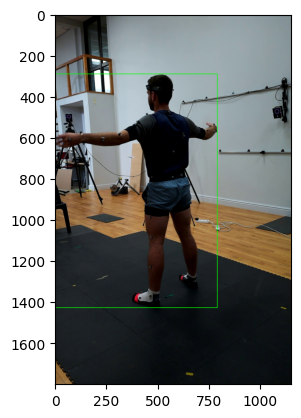

In [8]:
import matplotlib.pyplot as plt

df = pd.read_csv(os.path.join(data_root, 'val.csv'))
row = df.iloc[0]
img_path = row['img_path']

img = cv2.imread(os.path.join(data_root, 'frames', img_path))

box_x = int(row['box_x'])
box_y = int(row['box_y'])
box_w = int(row['box_w'])
box_h = int(row['box_h'])

cv2.rectangle(img, (box_x, box_y), (box_x + box_w, box_y + box_h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()